In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer 

In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_shape_z = pd.read_csv(os.path.join(folder_path, "features_shape_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_shape_mm = pd.read_csv(os.path.join(folder_path, "features_shape_all_minmax.csv"))

In [3]:
df_shape_z

,area,perimeter,eccentricity,extent,solidity,orientation,major_axis_length,minor_axis_length,filename,label
0,-0.583118,-0.400436,0.906160,-0.582698,-0.575237,0.222877,0.073916,-0.551640,callo_1.png,smaller
1,0.309679,-0.370852,0.470658,1.610662,1.353973,-1.486407,-0.154703,-0.273130,callo_10.png,smaller
2,-0.984303,-0.917667,0.154557,-0.451681,0.101514,1.140226,-1.103339,-0.836561,callo_100.png,smaller
3,-0.687900,-0.421052,0.916516,-0.820335,-1.081020,-0.160890,-0.020236,-0.610833,callo_101.png,smaller
4,-1.158700,-1.036515,1.014416,-0.949021,-0.799311,0.172218,-0.905468,-1.115828,callo_102.png,smaller
...,...,...,...,...,...,...,...,...,...,...
532,-0.050597,-0.388500,0.356115,0.184470,0.919636,-0.416786,-0.284977,-0.288768,callo_95.png,higher
533,0.120929,-0.216451,0.359628,-0.036123,0.516277,-1.309627,-0.117787,-0.166158,callo_96.png,higher
534,1.506774,1.635715,0.194795,-0.972139,-1.156205,0.406903,1.840907,1.519740,callo_97.png,higher
535,2.518707,2.206114,-1.152947,-0.516456,-0.902743,0.374401,1.384760,2.292583,callo_98.png,higher


In [4]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_shape_z_cl= df_shape_z.drop(columns=['filename', 'label'])

Se realiza clustering con k-means. Para averiguar cual va a ser el mejor valor de k o clusters se aplica el método
del "codo". También se simularán con diferentes números de clusteres la silueta.

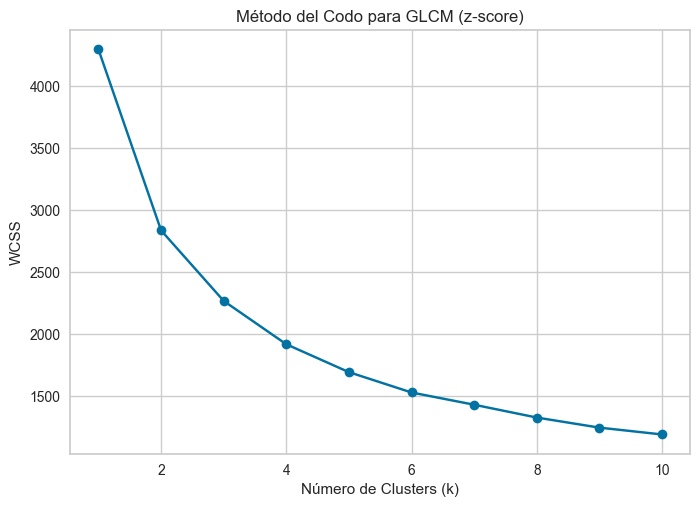

In [5]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_shape_z_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (z-score)')
plt.grid(True)
plt.show()

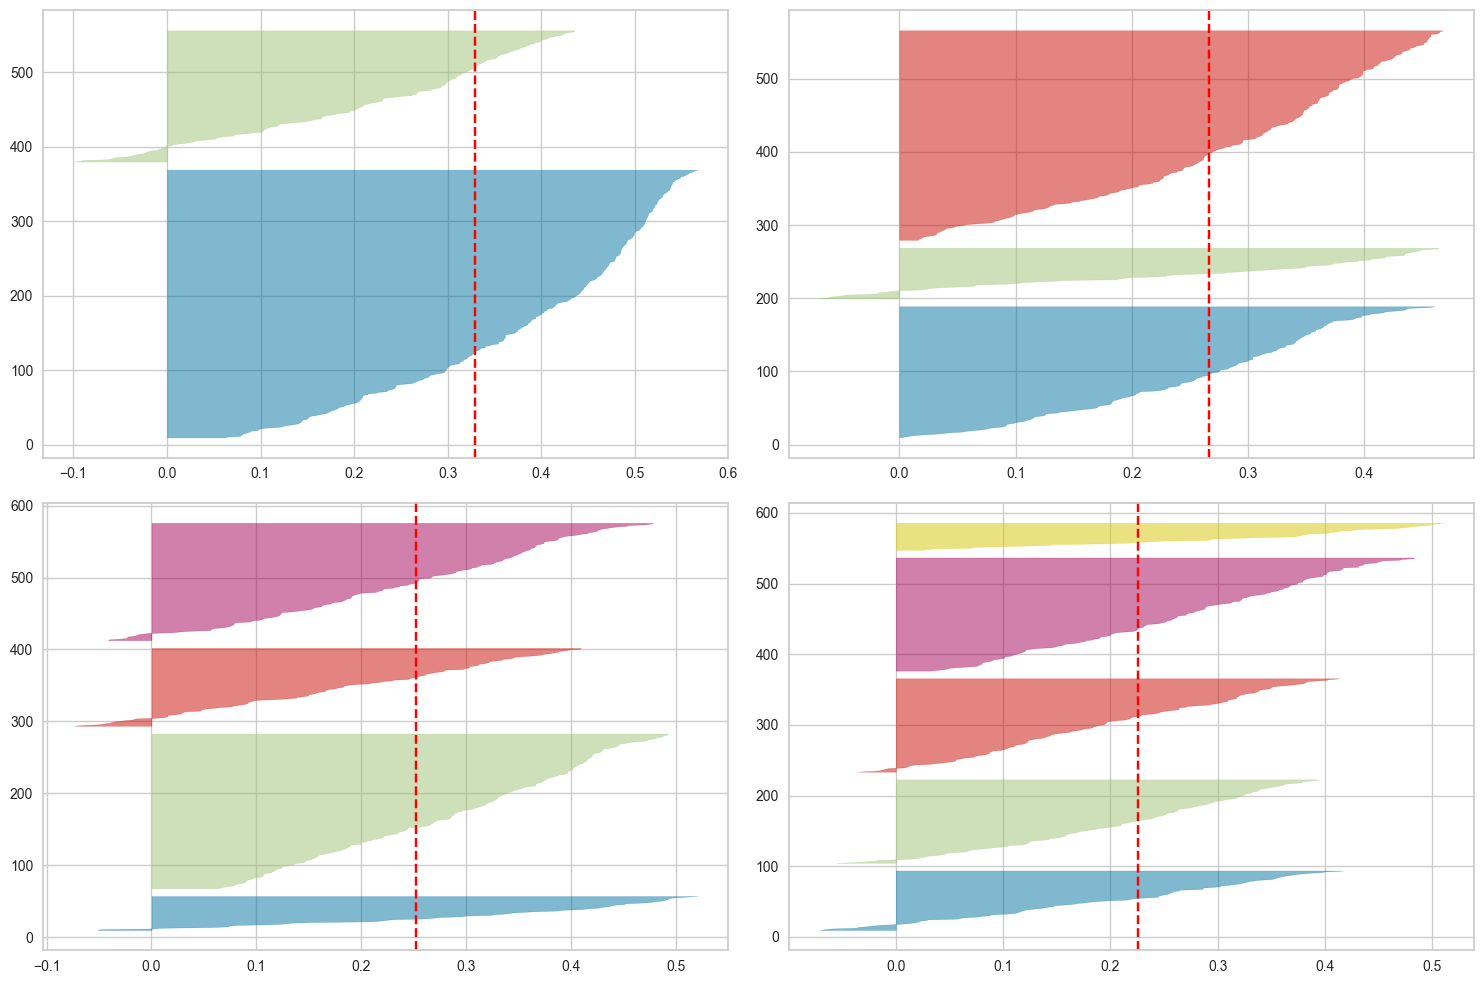

In [7]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_shape_z_cl)  

plt.tight_layout()
plt.show()

Aunque se obtiene mejor valor de silueta con dos clusteres, pero se van a probar 3 teniendo en cuenta ambos criterios

In [17]:
#Modelo k-means
cluster_shape_z= KMeans(init='k-means++',n_clusters=3,random_state=42)
cluster_shape_z.fit(df_shape_z_cl)   

KMeans(n_clusters=3, random_state=42)

In [18]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_shape_z['Cluster'] = cluster_shape_z.labels_
pd.crosstab(df_shape_z['Cluster'], df_shape_z['label'])

label,higher,smaller
Cluster,,
0,104,76
1,68,2
2,96,191


In [19]:
silhouette_avg_shape_z = silhouette_score(df_shape_z_cl, cluster_shape_z.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_shape_z}')

Índice de silueta promedio: 0.26647493695246455


Ahora se realiza lo mismo pero con la normalización min-max

In [21]:
df_shape_mm

,area,perimeter,eccentricity,extent,solidity,orientation,major_axis_length,minor_axis_length,filename,label
0,0.123741,0.207031,0.946560,0.319555,0.402687,0.569157,0.434232,0.145340,callo_1.png,smaller
1,0.274657,0.212550,0.879958,0.728153,0.885656,0.047033,0.380523,0.193392,callo_10.png,smaller
2,0.055926,0.110544,0.831616,0.343962,0.572109,0.849373,0.157662,0.096182,callo_100.png,smaller
3,0.106029,0.203185,0.948144,0.275286,0.276067,0.451930,0.412113,0.135127,callo_101.png,smaller
4,0.026447,0.088373,0.963116,0.251313,0.346592,0.553682,0.204147,0.048000,callo_102.png,smaller
...,...,...,...,...,...,...,...,...,...,...
532,0.213757,0.209258,0.862440,0.462470,0.776922,0.373763,0.349918,0.190694,callo_95.png,higher
533,0.242751,0.241353,0.862978,0.421376,0.675943,0.101033,0.389195,0.211848,callo_96.png,higher
534,0.477011,0.586867,0.837769,0.247006,0.257245,0.625370,0.849347,0.502719,callo_97.png,higher
535,0.648065,0.693272,0.631656,0.331895,0.320698,0.615442,0.742185,0.636058,callo_98.png,higher


In [23]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_shape_mm_cl= df_shape_mm.drop(columns=['filename', 'label'])

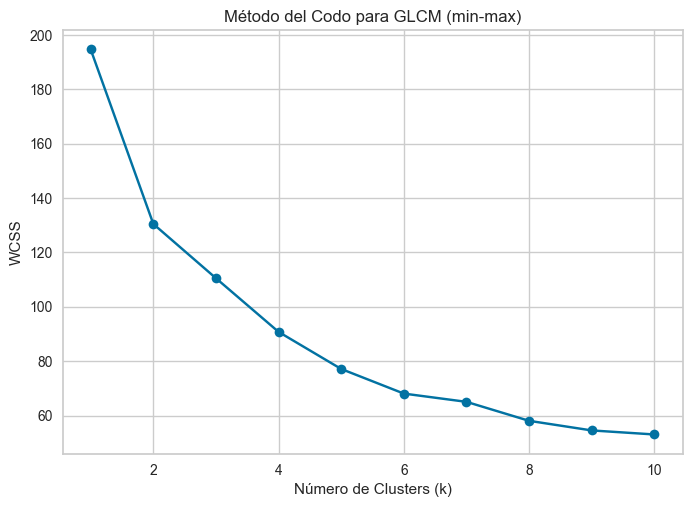

In [24]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_shape_mm_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (min-max)')
plt.grid(True)
plt.show()

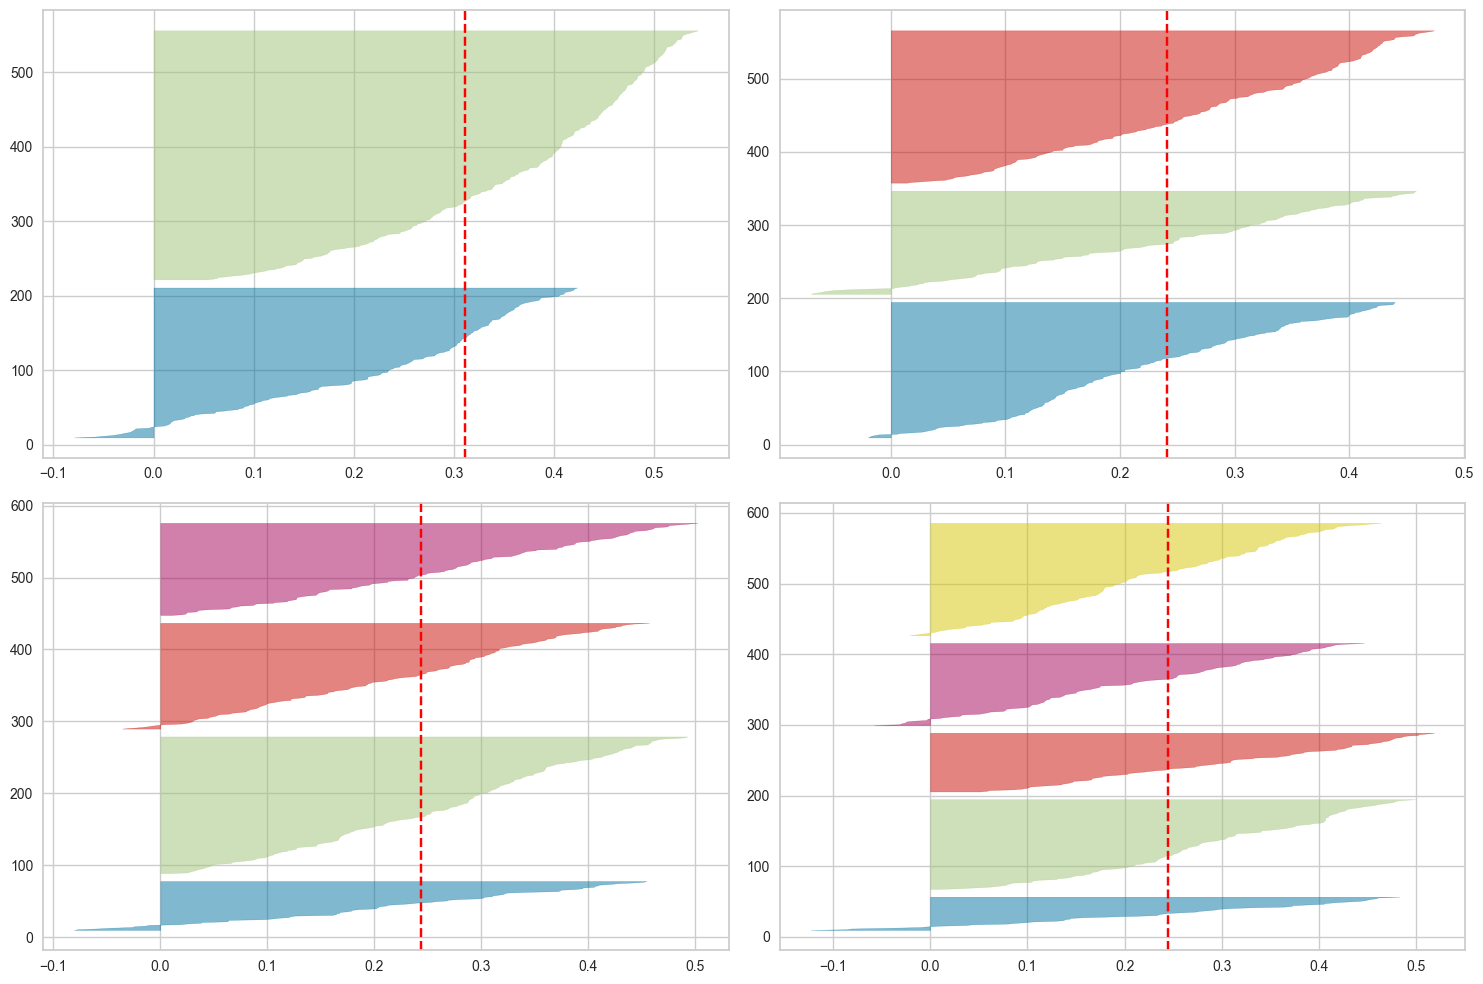

In [25]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_shape_mm_cl)  # Usa tu dataframe ya escalado o transformado

plt.tight_layout()
plt.show()

In [38]:
#Modelo k-means
cluster_shape_mm= KMeans(init='k-means++',n_clusters=4,random_state=42)
cluster_shape_mm.fit(df_shape_mm_cl) 

KMeans(n_clusters=4, random_state=42)

In [39]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_shape_mm['Cluster'] = cluster_shape_mm.labels_
pd.crosstab(df_shape_mm['Cluster'], df_shape_mm['label'])

label,higher,smaller
Cluster,,
0,61,147
1,76,38
2,69,83
3,62,1


In [40]:
silhouette_avg_shape_mm = silhouette_score(df_shape_mm_cl, cluster_shape_mm.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_shape_mm}')

Índice de silueta promedio: 0.2438294751302744
